# Misionari i kanibali - projektni zadatak

𝑁 misionara i 𝑀 kanibala se nalaze na jednoj strane rijeke, zajedno s brodom koji može primiti
minimalno 𝐾 i maksimalno 𝐿 ljudi. Pronađite način kako ih sve premjestiti na drugu stranu, s time da
broj misionara ni na jednoj strani ne smije biti manji od broja kanibala. Implementirajte rješenje
navedenog problema metodom pretraživanja u širinu i dubinu. Usporedite uspješnost algoritama
prema broju koraka, vremenu izvođenja i utrošku memorije u ovisnosti o parametrima 𝑁, 𝑀, 𝐾 i 𝐿.


http://en.wikipedia.org/wiki/Missionaries_and_cannibals_problem

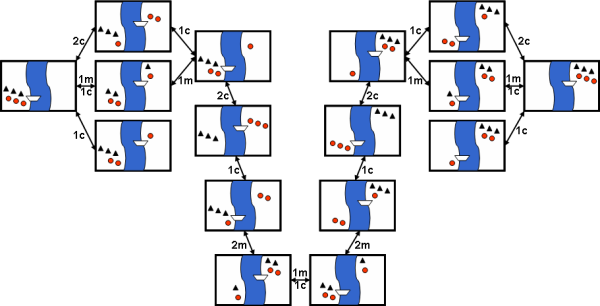

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
from pylab import rcParams

## 0. Pomoćne funkcije i klase

In [2]:
class BoatSide(Enum):
    LEFT = 0
    RIGHT = 1
    
class Sol(Enum):
    NUM_OF_JUMPS = 0
    PRINT = 1
    NOTHING=2
    PRINT_STEPS=3


In [3]:
def printCoasts(data,C=3,M=3):
    
    if C> 7:
        print("Prevelik dataset")
        return

    fig, ax = plt.subplots()

    offest=0.5
    ofssetMC=0.1
    ofssetMCy=0.4
    poc_ind=0.3
    ax.broken_barh([(0.3, 0.4)], (0, poc_ind+len(data)+ofssetMCy),facecolors='tab:blue')
    plt.axis('off')

    i=0
    for redak in data:
        for c_ind in range(redak[0]):

            plt.plot(ofssetMC*c_ind, poc_ind+ i, 'rx')
        for c_ind in range(C-redak[0]):
            plt.plot(ofssetMC*c_ind+0.8, poc_ind+ i, 'rx')

        for m_ind in range(redak[1]):
            plt.plot(ofssetMC*m_ind, poc_ind+i+ofssetMCy, 'yo')
        for m_ind in range(M-redak[1]):
            plt.plot(ofssetMC*m_ind+0.8, poc_ind+i+ofssetMCy, 'yo')

        if  not redak[2]:
            ax.broken_barh([(0.25, 0.1)], (i+0.25, 0.5),facecolors='tab:brown')
        else:
            ax.broken_barh([(0.65, 0.1)], (i+0.25, 0.5),facecolors='tab:brown')
            
        plt.plot([0-0.2,1+0.2],[i,i],color='black' )
        i +=1

    ax.grid(True)
    plt.show()   

Funkcija vraca SVE kombinacije putnika u brodu za zadan minBoatSize i maxBoatSize

In [4]:
def give_all_combs(minBoatSize,maxBoatSize):
    boatSize=list(range(minBoatSize,maxBoatSize+1)) # sizes of the boat
    combs=[]

    for i in boatSize:
        can=0
        mis=i
        while(True):
            combs.append([can,mis])
            if mis==0:
                break
            mis=mis-1
            can=can+1
    return combs

Funkcija provjerava dali je child validan čvor 

    To jest,
    -ako na lijevoj strani ima vise kanibala od misionara
    -ako na desnoj strani ima vise kanibala od misionara
   
    -unutrarnji ternarni operatori jos se brinu za situacije kad je na obali 0 misionara ILI 0 kanibala

In [5]:
def isChildOK(childC,childM,childBoat,C,M):
    
    if childC > childM:
        return True if (not childC or not childM) else False   
            
    if C-childC > M-childM:
        return True if (not (C-childC) or not (M-childM)) else False   
    return True

Funkcija provjerava dali je SAMA kombinacija okay, da nebi slučajno uzeli u brod vise kan. ili mis. nego ih uopce ima na obali

In [6]:
def isCombOK(lc,lm,C,M,curr_comb,isBtLeft,PRINT=False):

    if (lc < curr_comb[0]  or lm < curr_comb[1]) and isBtLeft  : #combination not compatible
        return False
    
    elif (C-lc < curr_comb[0]  or M-lm < curr_comb[1] ) and not isBtLeft: #combination not compatible
        return False
    return True  

## 1. Algoritmi za izračun mis/kan za proizvoljne M,K,minBoatSize,maxBoatSize
-DFS rekurzivni

-DFS

-BFS

-BFS bidirectional

### Rekurzivna varijanta 
#### (isključena iz testiranja, niže su prave iterativne varijante za DFS)

In [7]:
def recursion1(lc,lm,rc,rm,boat,p):
    p=p+"|"
    print(p+"Sad sam u stanju: "+ str(rc) + " " + str(rm) )
    if visited[lm][lc][boat.value] == True:
        print(p+"TO STANJE VEC IMAM,return")
        return False
    else:
        visited[lm][lc][boat.value]=True
    if lc == 0 and lm == 0:
        print(p+"NASAO")
        return True            #SOLUTION FOUND
    
    isBtLeft= (boat == BoatSide.LEFT)
    isBtLeft_1= 1 if (isBtLeft) else -1
    
    boat=BoatSide((boat.value + 1) % 2)
        
        
    for curr_comb in ALL_COMBS:
        
        

        if (lc < curr_comb[0]  or lm < curr_comb[1]) and isBtLeft  :
            #combination not compatible
            continue
        elif (rc < curr_comb[0]  or rm < curr_comb[1] ) and not isBtLeft:
            continue

        if (lc-lm) >  isBtLeft_1*(curr_comb[0]-curr_comb[1]) and (lm != curr_comb[1] or not (isBtLeft)) and (lm != -curr_comb[1] or (isBtLeft)):
            continue
        if (rc-rm) >   isBtLeft_1*(curr_comb[1]-curr_comb[0]) and (rm != curr_comb[1] or (isBtLeft))  and (rm != -curr_comb[1] or not (isBtLeft)):
            continue  #broj kanib veci od br.misionara poslije iskrcavanja

        print(p+"Idem brodom: "+ str(curr_comb) )
        print_coast(lc,
             lm,
             rc,
             rm,BoatSide((boat.value + 1) % 2),p)
        
        if isBtLeft:
            if find2(lc-curr_comb[0],
             lm-curr_comb[1],
             rc+curr_comb[0],
             rm+curr_comb[1],boat,p) == True:
                print(p+"vracam se iz " + str(lc-curr_comb[0]) + " " + str(lm-curr_comb[1]))
                return True
        else:
             if find2(lc+curr_comb[0],
                 lm+curr_comb[1],
                 rc-curr_comb[0],
                 rm-curr_comb[1],boat,p) == True:
                print(p+"vracam se iz " + str(lc+curr_comb[0]) + " " + str(lm+curr_comb[1]))
                return True
        
     

### BFS

    Vremenska slozenost : O(V+E)
    

In [8]:
#solutionBFS(can=3,mis=4) greska ,misionara manje na lijevoj strani
def solutionBFS(C=3,M=3,boatMIN=1,boatMAX=2,solution=Sol.NOTHING,limit=-1):

    #############################   Pocetni uvjeti
    
    boat = BoatSide.LEFT
    ALL_COMBS=give_all_combs(boatMIN,boatMAX)
    visited=np.zeros((C+1, M+1,2), dtype=bool)
    q= []
    start=[C,M,boat.value]
    queue =   [(start,[start])]
    numOfSteps=0
    returnList=[]
    #############################   Pocetak algoritma

    #q.append([C,M,boat.value])
    visited[C][M][boat.value]=True  #Dodaj pocetni cvor
    
    while queue:
        
        parent,path = queue.pop(0)  
        
        if solution==Sol.PRINT_STEPS:
            print (parent) 
        returnList.append(parent)
        
        if parent[0]==0 and parent [1]==0:
            break

        for comb in ALL_COMBS:    
            numOfSteps=numOfSteps+1
            
            if not isCombOK(parent[0],parent[1],C,M,comb,not parent[2]):  
                continue
                
            #                                'brod desno'    
            child_C  = (parent[0]+comb[0]) if (parent[2]) else (parent[0]-comb[0])
            child_M  = (parent[1]+comb[1]) if (parent[2]) else (parent[1]-comb[1])
            child_bt = (parent[2]+1) % 2
            
            if not isChildOK(child_C,child_M,child_bt,C,M):  
                continue

            if not visited[child_C][child_M][child_bt]:
                queue.append(([child_C,child_M,child_bt], path + [[child_C,child_M,child_bt]]))
                #q.append([child_C,child_M,child_bt])   
                visited[child_C][child_M][child_bt] = True
                
    foundSolution=False            
    if (parent[0]==0 and parent[1]==0):
        foundSolution=True
        
    if solution==Sol.PRINT:
        print( "Rjesenje "+ ("je" if (parent[0]==0 and parent [1]==0) else "nije")  +" nadeno")
            
    if solution==Sol.NUM_OF_JUMPS:
        return numOfSteps,foundSolution
    else:
         return path,foundSolution
    

### BFS v2 - Bidirectional


In [9]:
class BIDIR:
    
    numOfSteps=0
    
    def __init__(self,C,M,boatMIN,boatMAX):
        self.C=C
        self.M=M
        self.START=[C,M,0]
        self.DEST= [0,0,1]
        self.ALL_COMBS=give_all_combs(boatMIN,boatMAX)
        
        self.src_queue=[(self.START,[self.START])]
        self.src_visited=np.zeros((C+1, M+1,2), dtype=bool)
        self.src_visited[C][M][0]=True
        
        self.dest_queue=[(self.DEST,[self.DEST])]            
        self.dest_visited=np.zeros((C+1, M+1,2), dtype=bool)
        self.dest_visited[0][0][1]=True
     
    def isIntersecting(self):
        for i in range(self.C):
                for j in range(self.M):
                    for b in range(2):
                        if (self.src_visited[i][j][b] and self.dest_visited[i][j][b]):
                            self.intersectingNode=[i,j,b]
                            return True
        return False
    
    def searchOneSide(self,comb,parent,path,side="SRC"):  
        if not isCombOK(parent[0],parent[1],self.C,self.M,comb,not parent[2]): 
                return False

        #                                'brod desno'    
        child_C  = (parent[0]+comb[0]) if (parent[2]) else (parent[0]-comb[0])
        child_M  = (parent[1]+comb[1]) if (parent[2]) else (parent[1]-comb[1])
        child_bt = (parent[2]+1) % 2

        if not isChildOK(child_C,child_M,child_bt,self.C,self.M): 
            return False

        if side=="SRC":
            if not self.src_visited[child_C][child_M][child_bt]:
                self.src_queue.append(([child_C,child_M,child_bt], path + [[child_C,child_M,child_bt]])) #, path + [[child_C,child_M,child_bt]]))
                self.src_visited[child_C][child_M][child_bt] = True
                return True
            
        elif side=="DEST":
            if not self.dest_visited[child_C][child_M][child_bt]:
                self.dest_queue.append(([child_C,child_M,child_bt], path + [[child_C,child_M,child_bt]])) #, path + [[child_C,child_M,child_bt]]))
                self.dest_visited[child_C][child_M][child_bt] = True
                return True

    def bidirectional_search(self):

        while self.src_queue and self.dest_queue:
            
            #print("*NEW STEP*")
            #print("SRC "  + str(src_queue))
            #print("DES "  + str(dest_queue))
            ########################################

            parent1,path1 = self.src_queue.pop(0)         #parent,path = queue.pop()    parent1 = src_queue.pop(0)       
            parent2,path2 = self.dest_queue.pop(0)

            for comb in self.ALL_COMBS:    
                self.numOfSteps=self.numOfSteps+1
                #FROM SOURCE
                #print(path1)

                if self.searchOneSide(comb,parent1,path1,side="SRC"):
                    #print("path from src")
                    test=1

                #FROM DESTINATION 
                if self.searchOneSide(comb,parent2,path2,side="DEST"):
                    #print("path from dest")
                    test=1


            ########################################
            
            intersecting_node=self.isIntersecting()
            if intersecting_node != False:
                break
                
        return self.numOfSteps,path1+path2[::-1]

### DFS

    Vremenska slozenost : O(V+E)
    Prostorna složenost : O(V)
    
    




In [21]:

def solutionDFS(C=3,M=3,boatMIN=1,boatMAX=2,solution=Sol.NOTHING,limit=-1):

    #############################   Pocetni uvjeti
    
    boat = BoatSide.LEFT
    ALL_COMBS=give_all_combs(boatMIN,boatMAX)
    visited=np.zeros((C+1, M+1,2), dtype=bool)
    q= []
    start=[C,M,boat.value]
    queue =   [(start,[start])]
    numOfSteps=0
    returnList=[]
    #############################   Pocetak algoritma

    #q.append([C,M,boat.value])
    visited[C][M][boat.value]=True  #Dodaj pocetni cvor
    
    while queue:
        

        #parent = q.pop(0)   
        parent,path = queue.pop()  
        
        if solution==Sol.PRINT_STEPS:
            print (parent) 
        returnList.append(parent)
        
        if parent[0]==0 and parent [1]==0:
            break

        for comb in ALL_COMBS:    
            numOfSteps=numOfSteps+1
            if not isCombOK(parent[0],parent[1],C,M,comb,not parent[2]):  
                continue
                
            #                                'brod desno'    
            child_C  = (parent[0]+comb[0]) if (parent[2]) else (parent[0]-comb[0])
            child_M  = (parent[1]+comb[1]) if (parent[2]) else (parent[1]-comb[1])
            child_bt = (parent[2]+1) % 2
            
            if not isChildOK(child_C,child_M,child_bt,C,M):  
                continue

            if not visited[child_C][child_M][child_bt]:
                queue.append(([child_C,child_M,child_bt], path + [[child_C,child_M,child_bt]]))
                visited[child_C][child_M][child_bt] = True
                
    foundSolution=False            
    if (parent[0]==0 and parent[1]==0):
        foundSolution=True
        
    if solution==Sol.PRINT:
        print( "Rjesenje "+ ("je" if (parent[0]==0 and parent [1]==0) else "nije")  +" nadeno")
            
    if solution==Sol.NUM_OF_JUMPS:
        return numOfSteps,foundSolution
    else:
         return path,foundSolution
    

## 2. Primjer koraka za 2 misionara i 2 kanibala 


    Primjeri nekih dodatnih kombinacija:
    boatSize = 2 
        parova <=3 mogu proci
    boatSize = 3 
        parova <=5 mogu proci
    boatSize = 4 
        parova <=5 mogu proci

Broj iteracija u DFS:      25
Broj iteracija u BFS:      45
Broj iteracija u BDIR-BFS: 30    <- bolji od obicnog BFS

PUT U DFS:
[[2, 2, 0], [0, 2, 1], [1, 2, 0], [1, 0, 1], [2, 0, 0], [0, 0, 1]]
PUT U BFS:
[[2, 2, 0], [1, 1, 1], [1, 2, 0], [1, 0, 1], [1, 1, 0], [0, 0, 1]]
PUT U Bidirectional-BFS:
[[2, 2, 0], [1, 1, 1], [1, 2, 0], [1, 0, 1], [1, 1, 0], [0, 0, 1]]


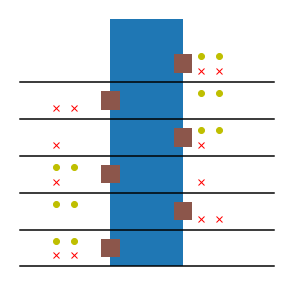

In [45]:
misionari = 2
kanibali  = 2
brod      = [1,2]  #min i max velicina broda


rcParams['figure.figsize'] = 5,5
sol,found=solutionDFS(  kanibali,misionari,brod[0],brod[1])
r  ,found=solutionDFS(  kanibali,misionari,brod[0],brod[1],solution=Sol.NUM_OF_JUMPS)
sol2 ,found=solutionBFS(kanibali,misionari,brod[0],brod[1])
r2 ,found=solutionBFS(  kanibali,misionari,brod[0],brod[1],solution=Sol.NUM_OF_JUMPS)
sol2 ,found=solutionBFS(kanibali,misionari,brod[0],brod[1])
r3,sol3=BIDIR(          kanibali,misionari,brod[0],brod[1]).bidirectional_search()


print("Broj iteracija u DFS:      " + str(r))

print("Broj iteracija u BFS:      " + str(r2))

print("Broj iteracija u BDIR-BFS: " + str(r3)  + "    <- bolji od obicnog BFS")
print()
print("PUT U DFS:")
print(sol)
print("PUT U BFS:")
print(sol2)
print("PUT U Bidirectional-BFS:")
print(sol3)
printCoasts(sol,2,2)

## 2.1: Testiranje koraka
Bitne su samo one iteracije koje nam daju rješenje,ignoriramo ostale

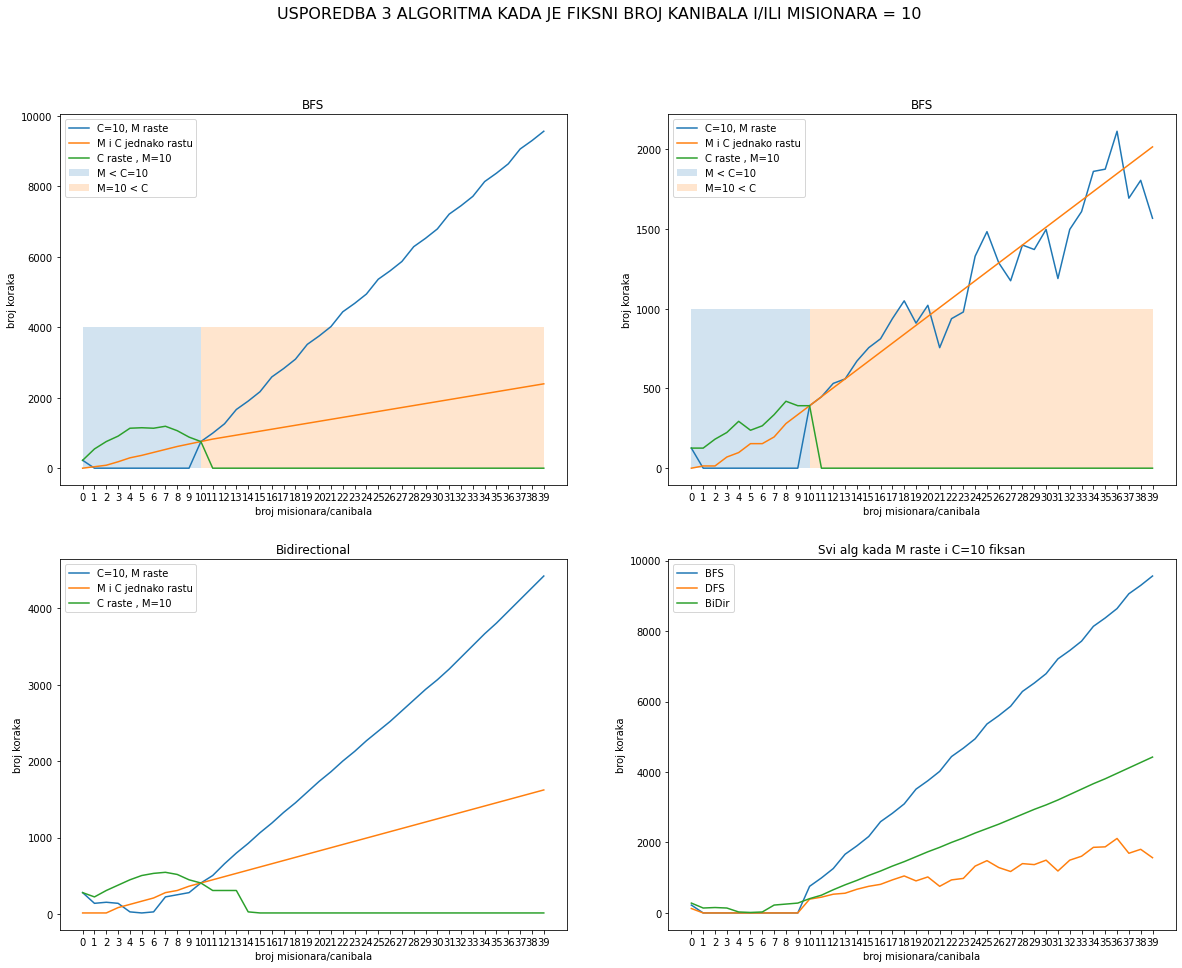

In [12]:
rcParams['figure.figsize'] = 20,15
np.seterr(all='warn')

fixPoint=10
level=40

X=list(range(level))
sol=np.zeros((9,level))
foundSol=np.zeros(6)

#ZA i = 1,2,3 POSTOJI RJ

for i in X:
    #solutionBFS(can=3,mis=3,boatMIN=1,boatMAX=2,returnSol=Sol.PRINT,limit=-1
    sol[0][i],foundSol[0]=solutionBFS(fixPoint,i,1,4,solution=Sol.NUM_OF_JUMPS)
    sol[1][i],foundSol[1]=solutionBFS(i,i,1,4,solution=Sol.NUM_OF_JUMPS)
    sol[2][i],foundSol[2]=solutionBFS(i,fixPoint,1,4,solution=Sol.NUM_OF_JUMPS)
    
    sol[3][i],foundSol[3]=solutionDFS(fixPoint,i,1,4,solution=Sol.NUM_OF_JUMPS)
    sol[4][i],foundSol[4]=solutionDFS(i,i,1,4,solution=Sol.NUM_OF_JUMPS)
    sol[5][i],foundSol[5]=solutionDFS(i,fixPoint,1,4,solution=Sol.NUM_OF_JUMPS)
    
    sol[6][i],s=BIDIR(fixPoint,i,1,4).bidirectional_search()
    sol[7][i],s=BIDIR(i,i,1,4).bidirectional_search()
    sol[8][i],s=BIDIR(i,fixPoint,1,4).bidirectional_search()
    j=0    
    for s in foundSol:
            if not s:
                sol[j][i]=0
            j+=1
    #print(foundSol2)
    
########################################
plt.subplot(2,2,1)
plt.fill_between(X[:(fixPoint+1)],[0] * (fixPoint+1),[4000] * (fixPoint+1),alpha=0.2,label="M < C="+ str(fixPoint))
plt.fill_between(X[fixPoint:],[0] * (level-fixPoint),[4000] * (level-fixPoint),alpha=0.2,label="M=" + str(fixPoint)+" < C ")

plt.plot(X, sol[0], label="C=" + str(fixPoint) + ", M raste")
plt.plot(X, sol[1], label='M i C jednako rastu')
plt.plot(X, sol[2], label='C raste , M=' + str(fixPoint))

plt.ylabel('broj koraka')
plt.title('BFS')
plt.xlabel('broj misionara/canibala')
plt.xticks(np.arange(0, level, step=1))
plt.legend()
########################################
plt.subplot(2,2,2)
plt.title('DFS')
plt.ylabel('broj koraka')
plt.title('BFS')
plt.xlabel('broj misionara/canibala')
plt.xticks(np.arange(0, level, step=1))

plt.plot(X, sol[3], label="C=" + str(fixPoint) + ", M raste")
plt.plot(X, sol[4], label='M i C jednako rastu')
plt.plot(X, sol[5], label='C raste , M=' + str(fixPoint))

plt.fill_between(X[:(fixPoint+1)],[0] * (fixPoint+1),[1000] * (fixPoint+1),alpha=0.2,label="M < C="+ str(fixPoint))
plt.fill_between(X[fixPoint:],[0] * (level-fixPoint),[1000] * (level-fixPoint),alpha=0.2,label="M=" + str(fixPoint)+" < C ")
plt.legend()
########################################
plt.subplot(2,2,3)
plt.title('Bidirectional')
plt.ylabel('broj koraka')
plt.xlabel('broj misionara/canibala')
plt.xticks(np.arange(0, level, step=1))
plt.plot(X, sol[6], label="C=" + str(fixPoint) + ", M raste")
plt.plot(X, sol[7], label='M i C jednako rastu')
plt.plot(X, sol[8], label='C raste , M=' + str(fixPoint))
plt.legend()
########################################
plt.subplot(2,2,4)
plt.title('Svi alg kada M raste i C='+str(fixPoint) +" fiksan" )
plt.ylabel('broj koraka')
plt.xlabel('broj misionara/canibala')
plt.xticks(np.arange(0, level, step=1))
plt.plot(X, sol[0], label='BFS')
plt.plot(X, sol[3], label='DFS')
plt.plot(X, sol[6], label='BiDir')
plt.legend()
plt.suptitle('USPOREDBA 3 ALGORITMA KADA JE FIKSNI BROJ KANIBALA I/ILI MISIONARA = '+ str(fixPoint), size=16)
plt.show()

## 2.2 Testiranje vremenske složenosti  
##### (samo za ilustraciju, ne predstavlja prosjecno vrijeme)
Bitne su samo one iteracije koje nam daju rješenje,ignoriramo ostale


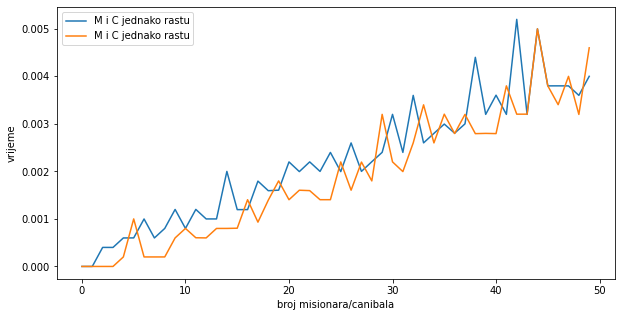

In [13]:
rcParams['figure.figsize'] =10,5
import time

X=list(range(50))
sol=np.zeros((6,50))
#ZA i = 1,2,3 POSTOJI RJ
ind=5

for i in X:
    #solutionBFS(can=3,mis=3,boatMIN=1,boatMAX=2,returnSol=Sol.PRINT,limit=-1
    start = time.time()
    temp,foundSol1=solutionBFS(fixPoint,i,1,4)
    done = time.time()
    sol[0][i] = done - start
    
    start = time.time()
    for t in range(ind):    
        temp,foundSol2=solutionBFS(i,i,1,4)
    done = time.time()
    sol[1][i] = (done - start)/ind
    
    start = time.time()
    temp,foundSol3=solutionBFS(i,fixPoint,1,4)
    done = time.time()
    sol[2][i] = done - start 
    
    start = time.time()
    temp,foundSol4=solutionDFS(fixPoint,i,1,4)
    done = time.time()
    sol[3][i] = done - start 
    
    start = time.time()
    for t in range(ind):   
        temp,foundSol5=solutionDFS(i,i,1,4)
    done = time.time()
    sol[4][i] = (done - start)/ind 
    
    start = time.time()
    temp,foundSol6=solutionDFS(i,fixPoint,1,4)
    done = time.time()
    sol[5][i] = done - start 

    if not foundSol1:
        sol[0][i]=0
    if not foundSol2:
        sol[1][i]=0
    if not foundSol3:
        sol[2][i]=0
    if not foundSol4:
        sol[3][i]=0
    if not foundSol5:
        sol[4][i]=0
    if not foundSol6:
        sol[5][i]=0
    #print(foundSol2)
#plt.plot(X, sol[0], label="C=" + str(fixPoint) + ", M raste")
plt.plot(X, sol[1], label='M i C jednako rastu')
#plt.plot(X, sol[2], label='C raste , M=' + str(fixPoint))
#plt.plot(X, sol[3], label="C=" + str(fixPoint) + ", M raste")
plt.plot(X, sol[4], label='M i C jednako rastu')
#plt.plot(X, sol[5], label='C raste , M=' + str(fixPoint))
plt.ylabel('vrijeme')
plt.xlabel('broj misionara/canibala')
plt.legend()
plt.show()

## Dodatak: Primjer korištenja korisnog alata za mjerenje prostorne složenosti memory_profiler 


    Line #    Mem usage    Increment  Occurences   Line Contents
    ============================================================
       376     67.9 MiB     67.9 MiB           1   @profile
       377                                         def solutionDFS(C=3,M=3,boatMIN=1,boatMAX=2,solution=Sol.NOTHING,limit=-1):
       378
       379                                             #############################   Pocetni uvjeti
       380
       381     67.9 MiB      0.0 MiB           1       boat = BoatSide.LEFT
       382     67.9 MiB      0.0 MiB           1       ALL_COMBS=give_all_combs(boatMIN,boatMAX)
       383     67.9 MiB      0.0 MiB           1       visited=np.zeros((C+1, M+1,2), dtype=bool)
       384     67.9 MiB      0.0 MiB           1       q= []
       385     67.9 MiB      0.0 MiB           1       start=[C,M,boat.value]
       386     67.9 MiB      0.0 MiB           1       queue =   [(start,[start])]
       387     67.9 MiB      0.0 MiB           1       numOfSteps=0
       388     67.9 MiB      0.0 MiB           1       returnList=[]
       389                                             #############################   Pocetak algoritma
       390
       391                                             #q.append([C,M,boat.value])
       392     67.9 MiB      0.0 MiB           1       visited[C][M][boat.value]=True  #Dodaj pocetni cvor
       393
       394     67.9 MiB      0.0 MiB          12       while queue:
       395     67.9 MiB      0.0 MiB          12           numOfSteps=numOfSteps+1
       396
       397                                                 #parent = q.pop(0)
       398     67.9 MiB      0.0 MiB          12           parent,path = queue.pop()
       399
       400     67.9 MiB      0.0 MiB          12           if solution==Sol.PRINT_STEPS:
       401                                                     print (parent)
       402     67.9 MiB      0.0 MiB          12           returnList.append(parent)
       403
       404     67.9 MiB      0.0 MiB          12           if parent[0]==0 and parent [1]==0:
       405     67.9 MiB      0.0 MiB           1               break
       406
       407     67.9 MiB      0.0 MiB          66           for comb in ALL_COMBS:
       408
       409     67.9 MiB      0.0 MiB          55               if not isCombOK(parent[0],parent[1],C,M,comb,not parent[2]):
       410     67.9 MiB      0.0 MiB          14                   continue
       411
       412                                                     #                                'brod desno'
       413     67.9 MiB      0.0 MiB          41               child_C  = (parent[0]+comb[0]) if (parent[2]) else (parent[0]-comb[0])
       414     67.9 MiB      0.0 MiB          41               child_M  = (parent[1]+comb[1]) if (parent[2]) else (parent[1]-comb[1])
       415     67.9 MiB      0.0 MiB          41               child_bt = (parent[2]+1) % 2
       416
       417     67.9 MiB      0.0 MiB          41               if not isChildOK(child_C,child_M,child_bt,C,M):
       418     67.9 MiB      0.0 MiB          16                   continue
       419
       420     67.9 MiB      0.0 MiB          25               if not visited[child_C][child_M][child_bt]:
       421     67.9 MiB      0.0 MiB          14                   queue.append(([child_C,child_M,child_bt], path + [[child_C,child_M,child_bt]]))
       422     67.9 MiB      0.0 MiB          14                   visited[child_C][child_M][child_bt] = True
       423
       424     67.9 MiB      0.0 MiB           1       foundSolution=False
       425     67.9 MiB      0.0 MiB           1       if (parent[0]==0 and parent[1]==0):
       426     67.9 MiB      0.0 MiB           1           foundSolution=True
       427
       428     67.9 MiB      0.0 MiB           1       if solution==Sol.PRINT:
       429                                                 print( "Rjesenje "+ ("je" if (parent[0]==0 and parent [1]==0) else "nije")  +" nadeno")
       430
       431     67.9 MiB      0.0 MiB           1       if solution==Sol.NUM_OF_JUMPS:
       432                                                 return numOfSteps,foundSolution
       433                                             else:
       434     67.9 MiB      0.0 MiB           1            return path,foundSolution